## Алгоритм Метрополиса-Гастингcа ##

### Вопрос 1. Зачем? ###

Один из основных интсрументов машинного обеспечения - теорема Баеса, все мы ее прекрасно знаем:

$$ p(\theta | D) = \frac{p(\theta)p(D | \theta)}{p(D)}$$ 
Где:
* $ D $ - данные<br>
* $ \theta $ - параметры модели, которые хотим обучить<br>
* $ p(D|\theta) $ - <em>апострериарная вероятность</em> - определение вероятностей параметров модели после того, как мы приняли во внимание данные<br>
* $ p(\theta | D) $ - <em>правдоподобие</em> - вероятность данных при условии зафиксированных параметров модели <br>
* $ p(\theta) $ - <em>априорная вероятность</em> - формализацией того, что мы знали раньше, ещё до всяких экспериментов
<br><br>

После того, как найдём $p(\theta|D)$, мы хотим предсказать новые значения переменных:

$$p(y| D) = \int p(y|\theta )p(\theta|D)d\theta$$

И в общем, поставленная нами задача машинного обучения так или иначе сводятся к тому, чтобы подсчитать математическое ожидание разных функций при условии сложного распределения, в которую подставлены значения некоторых переменных:

$$p(x)=p(x_{1},x_{2},...,x_{n})$$

И вроде всё так просто — умножили две функции, максимизировали результат — что такого? <br>
Проблема заключается в том, **что распределения, которые нас интересуют, обычно слишком сложные, чтобы их можно было максимизировать напрямую, аналитически. В них слишком много переменных, между переменными слишком сложные связи**





Чтобы было понятно,что не так - **пример**:<br><br>
Мы хотим рассортировать по темам новостей на основе уже имеющейся базы данных с темами: спорт, экономика, культура и т.д. ( все мы помним этот датасет).<br><br> 
Используем bag-of-words то есть новость теперь это множество слов, которые в нёй содержатся => В результате каждая новость <em>**x**</em> принимает значения из множества категорий <em>**V**</em> и описывается атрибутами:  $(a_{1},a_{2},...,a_{n})$

**Попытемся применить формулу Баеса на прямую:**<br><br>
Нам нужно найти наиболее вероятное значение данного атрибута, т.е.:

$$ \underset{v\in V}{arg max}(p(x=v|a_{1},a_{2},...,a_{n}))$$

По теореме Баеса получаем:<br>
$$\underset{v\in V}{arg max}\frac{p(a_{1},a_{2},...,a_{n}|x=v)p(x=v)}{p(a_{1},a_{2},...,a_{n})} =\underset{v\in V}{arg max}{(p(a_{1},a_{2},...,a_{n}|x=v)p(x=v)) }$$
Где:
* $p(x=v)$ - частоту встречаемости слова
* $p(a_{1},a_{2},...,a_{n}|x=v)$ - вероятность в точности такого набора слов в сообщениях на разные темы - очевидно, такой статистики взять неоткуда
<br><br>

Поэтому делается предположение о независимости слов при условии темы то есть разные слова в тексте на одну и ту же тему появляются независимо друг от друга:

$$p(a_{1},a_{2},...,a_{n}|x=v)=p(a_{1}|x=v)p(a_{2}|x=v)...p(a_{n}|x=v)$$

В этой трактовке уже все найти возможно - обучаем параметры каждого маленького распределения по отдельности, а затем выбраем $v$, дающее максимум произведения<br><br><br><br>
**Окей, вроде понятно в чём проблема,а что делается,когда мы не можем вводить такие допущения?<br>
-Сэмплирование.**

### Вопрос 2. Сэмплирование? ###


**<em>Cуть</em>**: мы не пытаемся вычислить нашу метрику на всем массиве данных, а берем подмножество, которое репрезентативно представляет нам нужные метрики. Это сэмпл может быть в 1000 раз меньше нашего массива данных, но при этом достаточно хорошо показывать нужные нам цифры.
<br><br>**<em>Идея применимо к нашей проблема:</em>** всё, что нам нужно, выражается в виде мат.ожиданий разнообразных функций по сложному распределению $p(x)$.Возьмем случайные точки по нашему распределению $x_{1},x_{2},...,x_{n}$ , тогда мат.ожидание любой функции можно апроксимировать как среднее арифметиическое в выбранных точках:

$$\mathbb{E} |f(x)|=\int f(x)p(x)dx\approx \frac{1}{R} \sum_{r=1}^{R}f(x^{r})$$

Вот и всё,вся задача фактически сводится к тому, чтобы научиться сэмплировать точки по распределению при условии, что мы можем в любой точке считать значение этого распределения.<br><br>
**Тонкости?**
* **Проклятие размерности:** если пространство размерности 1 считаем 10 значений функции, чтобы разбить интервал на отрезки по 0.1,а если пространство размерности 100?
* **Пропорциональная функция:** на самом деле мы считаем не значение $p(x)$, а значение $p^{*}(x)$,a точное значение вероятности можно просто подсчитать, нормализовав полученное распределение так, чтобы оно суммировалось в единицу (всё как в Наивном Баисе, там для этого и есть знаминатель).<br>**Однако это как раз и есть та сложная задача, которую мы сейчас пытаемся научиться решать: просуммировать все значения сложного распределения,поэтому мы не можем рассчитывать на значение истинных вероятностей, только на некоторую пропорциональную им функцию $p^{*}(x)$.**


### Вопрос 3. Сэмплирование на практике это как? ###

**Идея:** если равномерно выбрать точку под графиком функции плотности распределения $p(x)$, то её $x$-координата будет взята по распределению $p(x)$.<br><br>
Возьмём плотность распределения длины чашелистник, классически пример!

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from scipy.stats import norm
import matplotlib.pyplot as plt

In [16]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

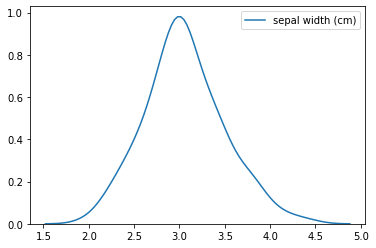

In [28]:
snsplot = sns.kdeplot(data['sepal width (cm)'], shade=False)
fig = snsplot.get_figure()

Вот у нас есть график распределение длины чашелистника, а дальше-то что? как строить?!

### Алгоритм Метрополиса-Гастингcа <br>
**Что это вообще:**<br> Алгоритм есть моделирование Цепи Маркова с некоторым стационарным распределнием.
<br>В конечном итоге выборки из построенной Цепи Маркова выглядят как выборки из этого распределения.
<br>Основное ограничение алгоритма - для сложных задач в долгосрочной перспективе может означать очень длительное время вычисления.

### Часть I. Ядро перехода ###


Чтобы реализовать алгоритм Метрополиса-Гастингса нам необходимо определить ядро перехода $Q$,мы его определяем САМИ.
<br> 
**Ядро перехода** - это просто способ случайного перемещения в новую позицию в пространстве (скажем, y), учитывая текущую позицию (скажем, x), то есть $Q$ - распределение по y для заданного x: 

$$Q =Q(y|x)$$

В своем большинсте, $Q$ - непрерывное распределение, то есть $Q(y|x)$ - плотность распределениея на y и поэтому $\forall x: \int Q(y|x)dy = 1$<br><br>
Прое всего получить следущую точку $y$ по текущей $x$ добавить к ней число выбранное по нормальному распределению $N(0,1)$:

$$y=x+ N(0,1) $$

Тогда полчим, ядро "Случайного блуждания" (random walk) :
$$ Q(y|x) = \frac{1}{\sqrt{2\pi}}e^{-0.5*(y-x)^{2}} $$

### Часть II. Псевдокод Алгоритма ###


1. Берем совершенно случайным образом первую точку: $X_{1}=x_{1}$
2. Для $t=1,2,..$:
    * Выбираем место для перехода, то есть высчитываем $y$ из $Q(x|y)$
    * Оцениваем подходит ли выбранное место для перехода, оно должно "лучше объяснять данные" то есть высчитываем "вероятность принятия": $$ A = min(1,\frac{p(y)Q(x_{t}|y)}{p(x_{t})Q(y|x_{t})} )$$
    * С вероятностью $A$ мы принимаем предлженное место и устанавливаем $x_{t+1} = x_{t}+y$, иначе $x_{t+1}=x_{t}$

### Часть III. Пробуем запрогать относительно выборки с нормальным распределением, чтобы сравнить с аналитическим решением ###

In [661]:
def sampler(data, samples=4, x_init=.5, mean=0, std=1, proposal_width=.5, plot=False):
    x_current = x_init
    posterior = [x_current]
    for i in range(samples):
        # Выбираем место для перехода
        x_proposal =  norm(x_current, proposal_width).rvs()

        # высчитываем функцию правдоподобия в текущей и предложенной точке - p(y),p(x)
        likelihood_current = norm(x_current, 5).pdf(data).prod()
        likelihood_proposal = norm(x_proposal, 5).pdf(data).prod()
        
        # высчитываем вероятность текущей и предложенной точки        
        prior_current = norm(mean,std).pdf(x_current)
        prior_proposal = norm(mean, std).pdf(x_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # высчитваем вероятность принятия
        p_accept = p_proposal / p_current
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(x_current, x_proposal, data,mean,std, accept, posterior, i)
        
        if accept:
            # Делаем шаг
            x_current = x_proposal
        
        posterior.append(x_current)
        
    return np.array(posterior)

In [688]:
def plot_proposal(x_current, x_proposal, data,mean,std, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('sample %i' % (i + 1))
    x = np.linspace(1, 5, 5000)
    color = 'g' if accepted else 'r'
        

    prior_current = norm(mean,std).pdf(x_current)
    prior_proposal = norm(mean, std).pdf(x_proposal)
    prior = norm(mean, std).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([x_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([x_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2), arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Распределение вероятности', title='current: aprior(x=%.2f) = %.2f\nproposal: aprior(x=%.2f) = %.2f' % (x_current, prior_current, x_proposal, prior_proposal))
    

    likelihood_current = norm(x_current, 5).pdf(data).prod()
    likelihood_proposal = norm(x_proposal, 5).pdf(data).prod()
    y = norm(loc=x_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(x_current, color='b', linestyle='--', label='x_current')
    ax2.axvline(x_proposal, color=color, linestyle='--', label='x_proposal')
    ax2.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(x=%.2f) = %.2f\nlikelihood(x=%.2f) = %.2f' % (x_current, 1e14*likelihood_current, x_proposal, 1e14*likelihood_proposal))
    
    posterior_analytical = calc_posterior_analytical(data, x, mean, std)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, x_current, mean, std)
    posterior_proposal = calc_posterior_analytical(data, x_proposal, mean, std)
    ax3.plot([x_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([x_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(x_proposal, 0.2), xytext=(x_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax3.set(title='posterior(x=%.2f) = %.5f\nposterior(x=%.2f) = %.5f' % (x_current, posterior_current, x_proposal, posterior_proposal))
    
    if accepted:
        trace.append(x_proposal)
    else:
        trace.append(x_current)
    ax4.plot(trace)
    ax4.set(xlabel='sample', ylabel='x', title='trace')
    plt.tight_layout()

In [689]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 5.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

**Визуализируем шаги алгоритма:**
* **В первом столбце** - априорное распределение вероятностей, то есть – наши предположения относительно $x_{t}$ до ознакомления с данными.
<br>Распределение не меняется, показываем здесь предложения нового значения $x_{t}$.<br>
Синии линии - текущее положение, зеленые и красные - принятые и отвергнутые предложенные местополодения соответственно.
* **Во втором столбце** – функция правдоподобия и вероятность принятия предложенной точки.
<br>График меняется в соответствии с предлагаемым $x_{t}$.
<br>Cиняя гистограмма – сами данные.
<br>Cплошная линия выводится либо зелёным, либо красным цветом – это график функции правдоподобия при $x_{t}$, предложенном на текущем шаге. 
<br>Чем сильнее функция правдоподобия соответствует гистограмме данных – тем лучше модель объясняет данные и тем выше будет результирующая вероятность
<br>Пунктирная линия зеленого цвета – это предложенный $x_{t}$, пунктирная синяя линия – это текущий $x_{t}$.
* **В третьей колонке** – нормализованное апостериорное распределение вероятностей
* **В четвёртой колонке** - след выборки,то есть – значения $x_{t}$, сэмплы, полученные на основе модели. Здесь мы показываем каждый сэмпл, вне зависимости от того, был ли он принят или отвергнут (в таком случае линия не меняется).

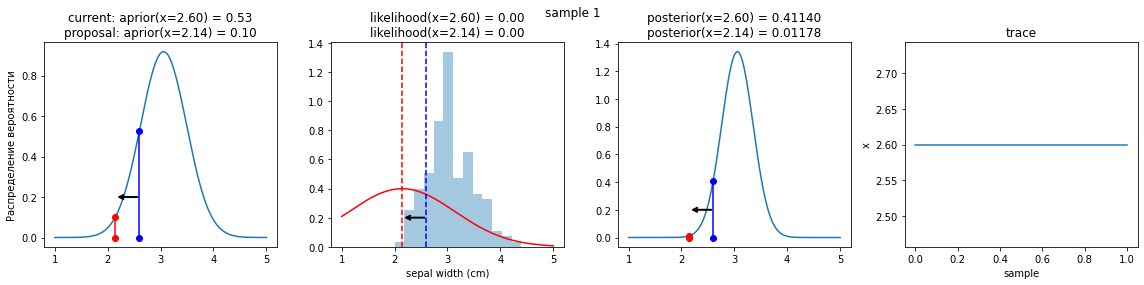

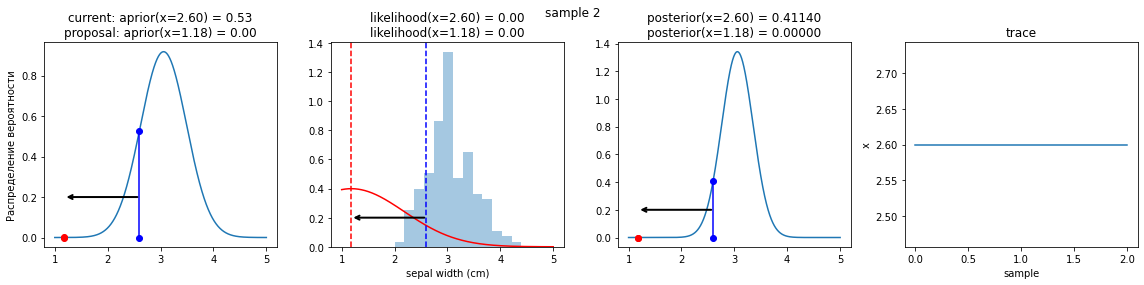

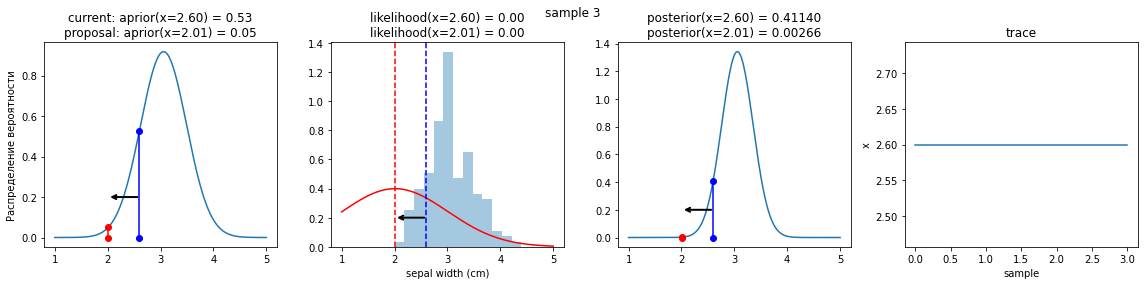

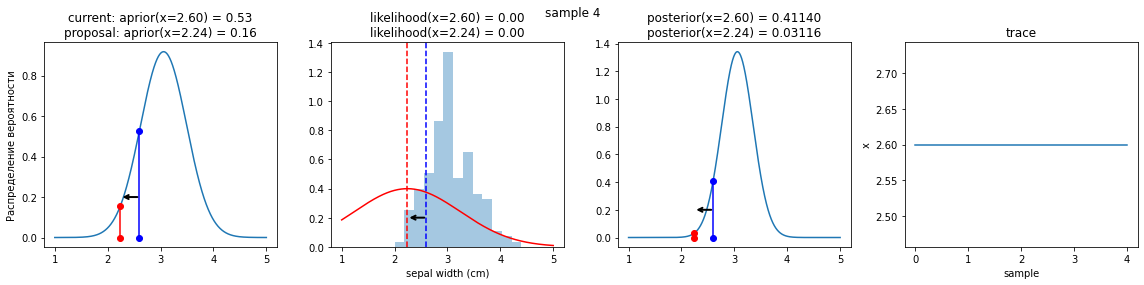

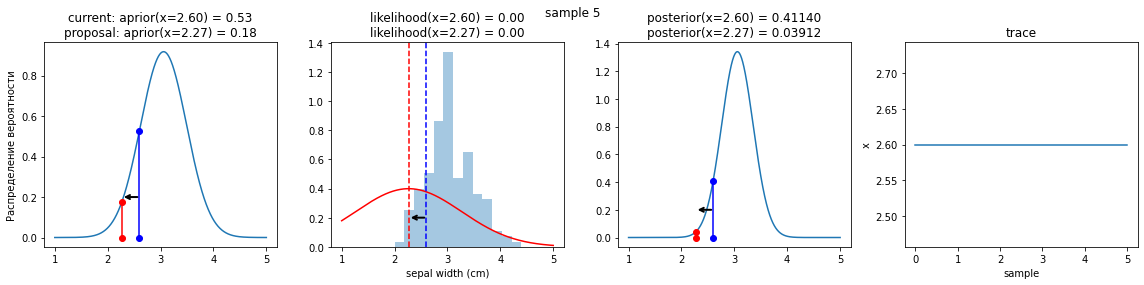

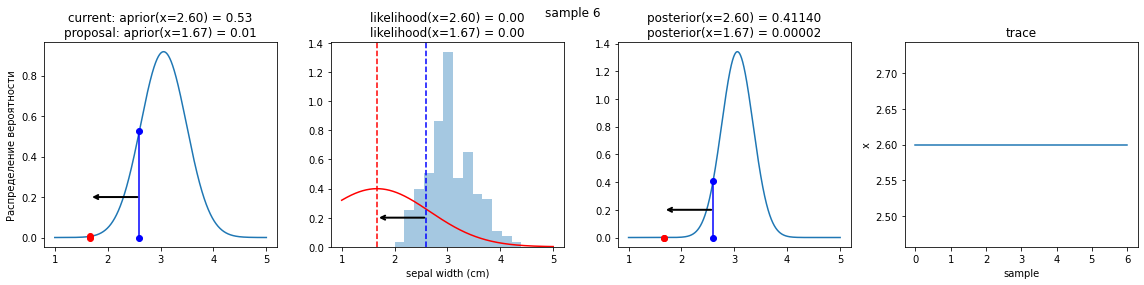

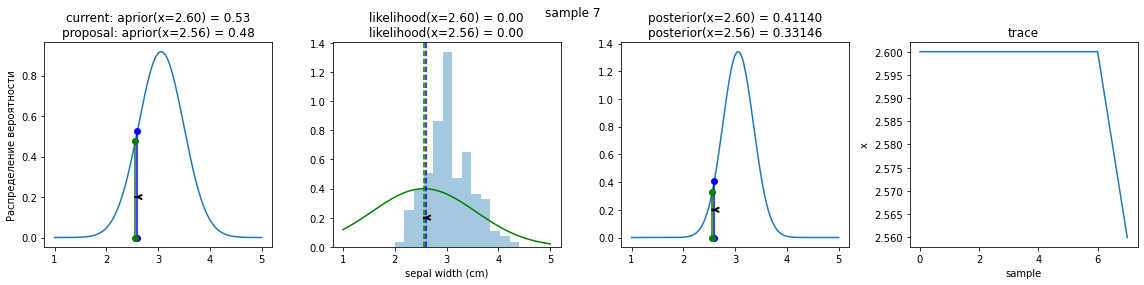

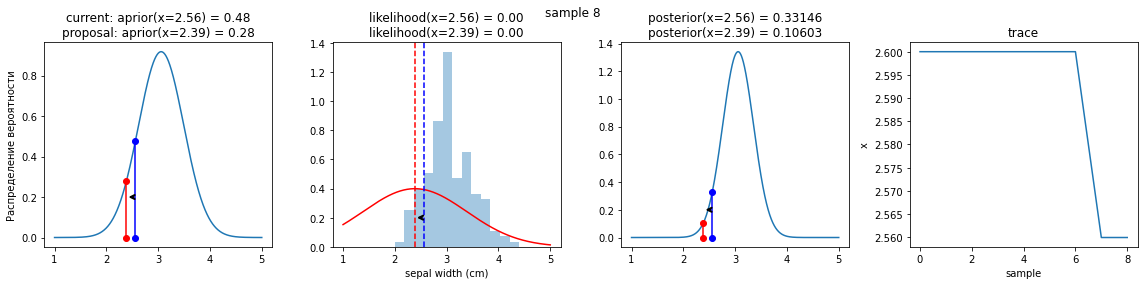

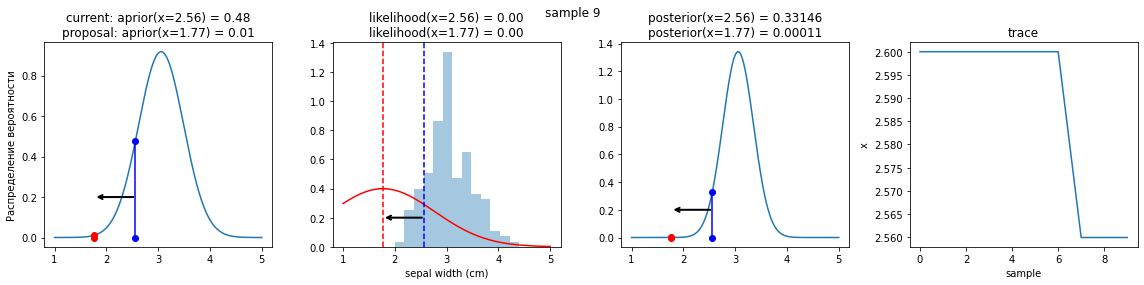

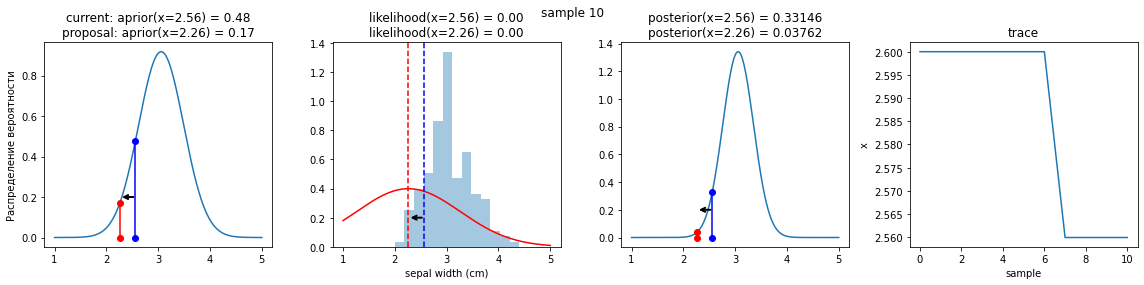

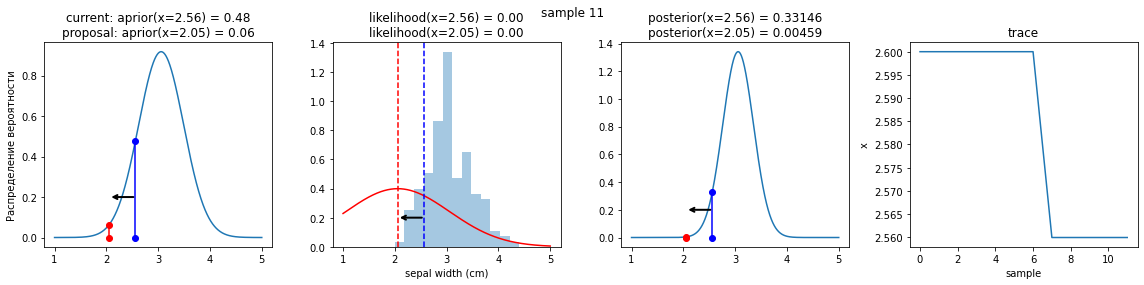

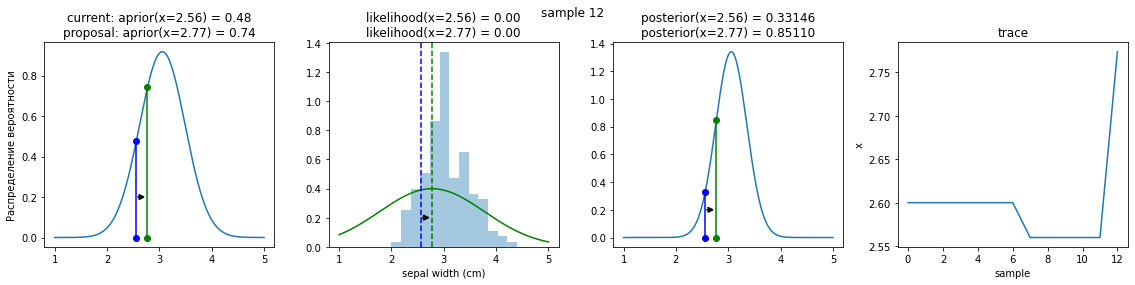

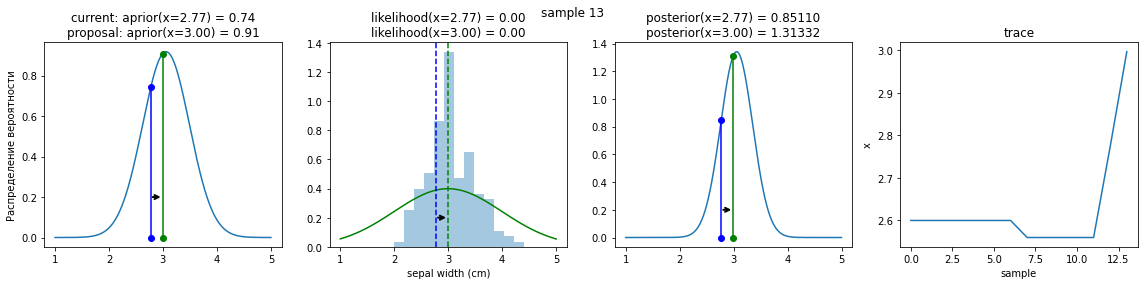

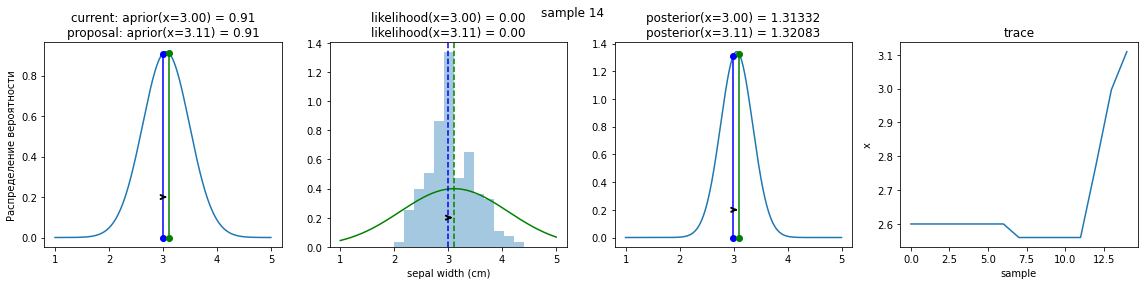

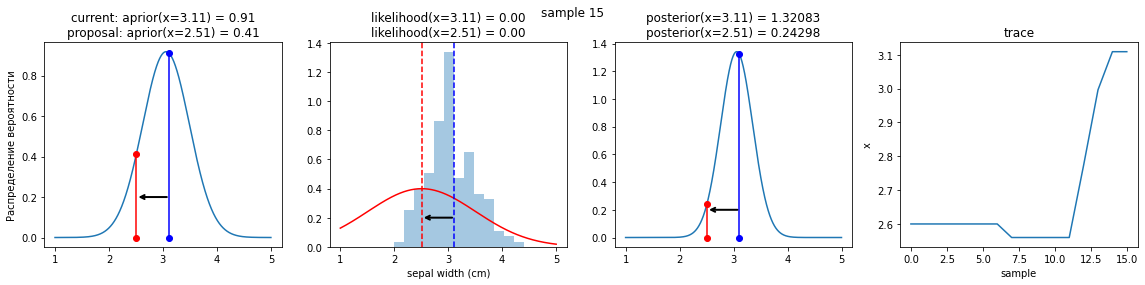

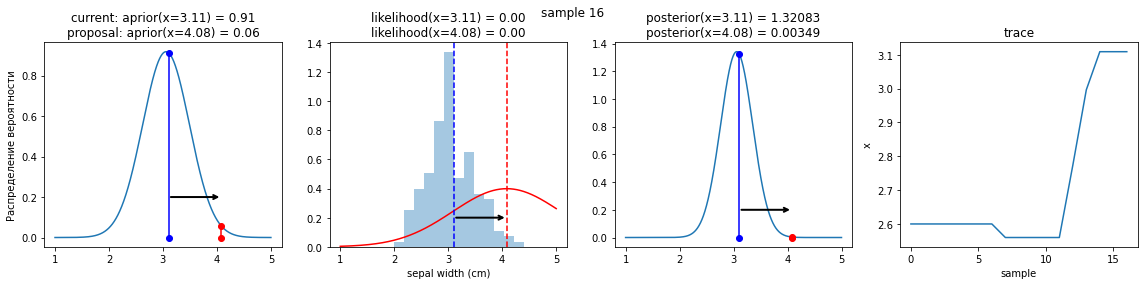

In [681]:
sampler(data['sepal width (cm)'], samples=16,x_init=2.6,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']),plot=True);

**И что? Как это поможет нам найти собственно то, что надо, апостериарную вероятность?**<br>
Посмотрим на след выборки- данные,которые производит система,сгенерируем большое количество сэмплов и глянем на них:

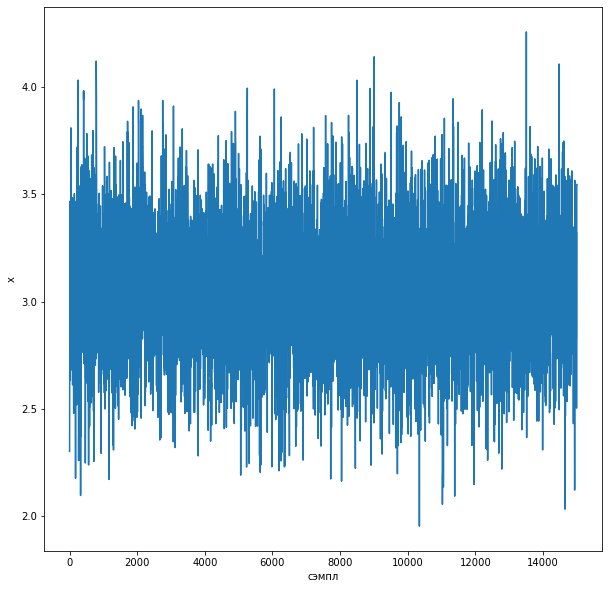

In [682]:
posterior = sampler(data['sepal width (cm)'], samples=15000, x_init=2.3,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']))
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='сэмпл', ylabel='x');

Чтобы получить приближённое значение апостериорного распределения вероятностей, достаточно построить гистограмму этих данных.<br> Важно помнить, что, хотя полученные данные похожи на те, сэмплированием которых мы занимались для подгонки модели, это два разных набора данных!!!!<br><br>
Слёдующий график показывает, каким должно быть x:<br>
Так как я выбрал выборку с нормальным распределением, то получили ожидаемый вид, аналитическое решение подтверждает то, что я правильно приминил сэмплирование

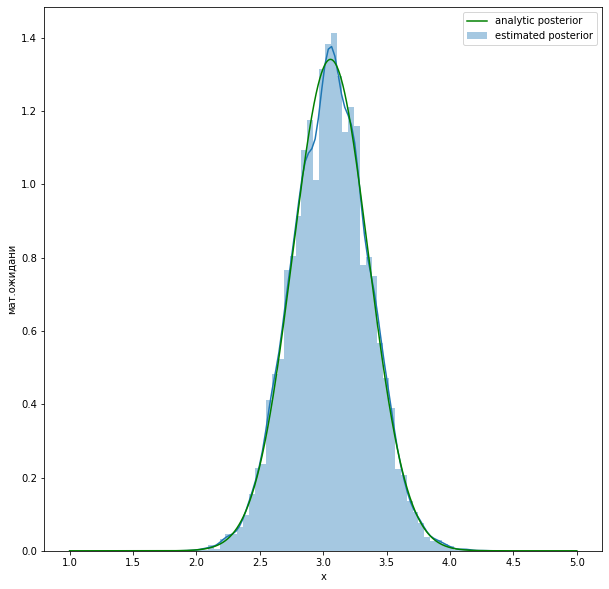

In [683]:
ax = plt.subplot()
sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(1, 5, 5000)
post = calc_posterior_analytical(data['sepal width (cm)'], x ,np.mean(data['sepal width (cm)']), np.std(data['sepal width (cm)']))
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='x', ylabel='мат.ожидани');
ax.legend();

**Прикольно...А что насчёт выбора шага в сэмплировании, на сколько важно?**<br>
Прогоним еще разок с маленьким шагом,а затем с большим и выясним

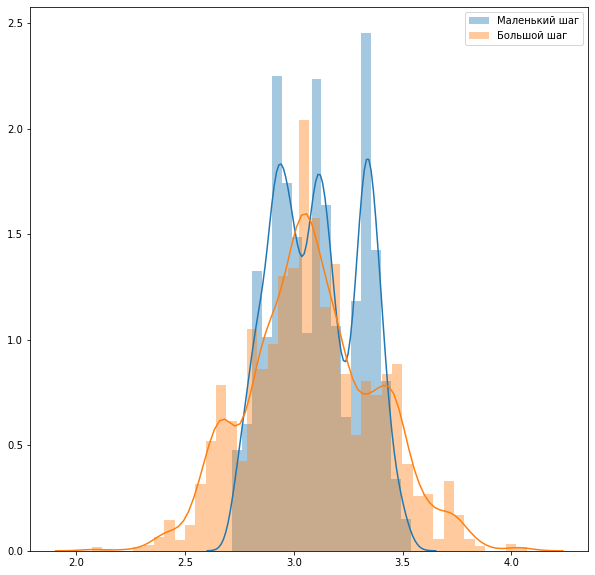

In [686]:
posterior_small = sampler(data['sepal width (cm)'], samples=5000, x_init=2.6, proposal_width=.01,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']))
posterior_large = sampler(data['sepal width (cm)'], samples=5000, x_init=2.6, proposal_width=3.,mean=np.mean(data['sepal width (cm)']) ,std=np.std(data['sepal width (cm)']))
sns.distplot(posterior_small[1000:], label='Маленький шаг')
sns.distplot(posterior_large[1000:], label='Большой шаг');
_ = plt.legend();

### Самое время попоробовать алгоритм Метрополиса-Гастингса на практике... ###